In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

## Fase 1 - Início

1. Objetivo: Gerar um Dataframe com os dados necessários e adequados para realizar as previsões.

- A. Importar dados;
- B. Selecionar os dados depois do ano 2000 em diante;
- C. Selecionar municípios com mais de 100 mil habitantes;
- D. Descartar os municípios com poucas observações;
- E. Selecinar as Variáveis que vamos utilizar para fazer previsões (AG001 e ES001)

In [3]:
arquivo = "dados/Base_com_Variaveis_Reduzidas_2022_07_14.csv"

In [4]:
df = pd.read_csv(arquivo, encoding = 'ISO-8859-1', sep = ';')

In [5]:
df.rename(columns = {'POP_TOT':'POPTOT', 'POP_URB':'POPURB', 'Ano_Ref' : 'ANO'}, inplace = True)

In [6]:
# Deleta a coluna Deflator_PIB_Acum
drop_deflator = ['Deflator_PIB_Acum']
df.drop(drop_deflator, axis = 1, inplace = True)

In [7]:
df.isnull().sum()/df.shape[0]

Linha_Original    0.000000
Municipio         0.000000
Cod_Municipio     0.000000
POPTOT            0.000000
POPURB            0.000000
ANO               0.000000
Cod_Prestador     0.000000
Prestador         0.000000
Tipo_Serv         0.000000
Nat_Jur           0.000000
AG001             0.224440
ES001             0.816435
FN001             0.234578
FN002             0.231377
FN003             0.865315
FN006             0.257737
FN007             0.992529
FN023             0.464034
FN024             0.889328
FN038             0.998186
dtype: float64

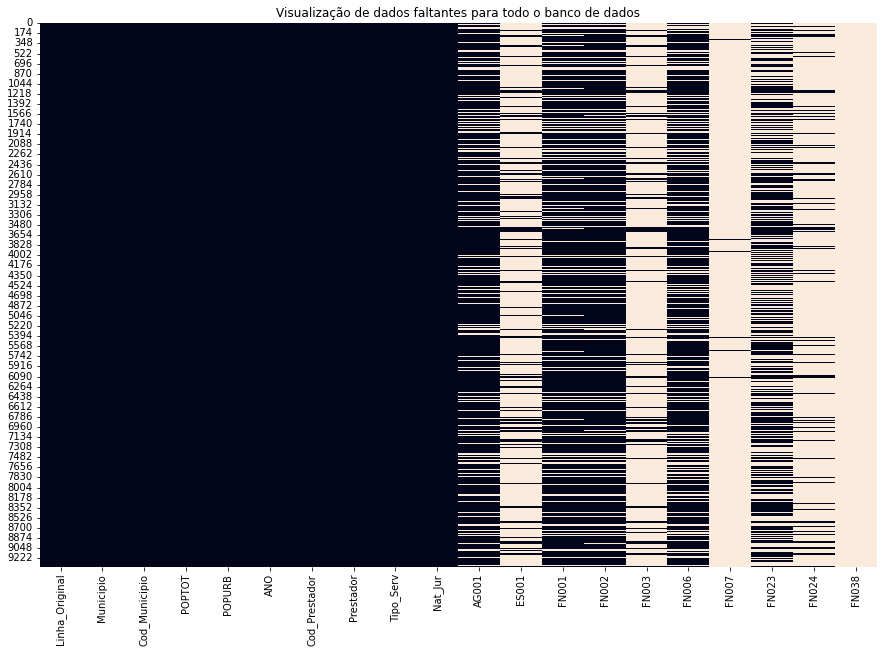

In [8]:
sns,set()
plt.figure(figsize = (15,10))
plt.title('Visualização de dados faltantes para todo o banco de dados')
sns_plot = sns.heatmap(df.isnull(), cbar = False)
sns_plot.figure.savefig('Imagens/' + 'heatmap-completo' +'.png')

In [9]:
# Dados a partir de 2000
df = df[df['ANO'] >= 2000]

In [10]:
df = df.set_index('ANO')

In [11]:
# Municípios com mais de 100.000 habitantes
df_mais_de_cem = df[df['POPTOT'] > 100000]

In [12]:
df_mais_de_cem.head()

,Linha_Original,Municipio,Cod_Municipio,POPTOT,POPURB,Cod_Prestador,Prestador,Tipo_Serv,Nat_Jur,AG001,ES001,FN001,FN002,FN003,FN006,FN007,FN023,FN024,FN038
ANO,,,,,,,,,,,,,,,,,,,
2000,True,Alvorada,430060,183968,183365,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,Sociedade de economia mista com administracao ...,184666.0,33353.0,NaN,"10998076,5","807445,19","11205594,34",NaN,"289710,45","2021,98",NaN
2001,True,Alvorada,430060,188756,188137,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,Sociedade de economia mista com administracao ...,191885.0,NaN,"7618544,92",6852975,"765569,92","12579095,3",NaN,"1045486,59",NaN,NaN
2002,True,Alvorada,430060,192789,192157,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,Sociedade de economia mista com administracao ...,194479.0,33820.0,"13932761,48","13034256,65","898504,83","14462199,76",NaN,"198521,63",NaN,NaN
2003,True,Alvorada,430060,196882,196237,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,Sociedade de economia mista com administracao ...,198705.0,35265.0,"16955674,05","15865771,61","1089902,44","16651246,62",NaN,"72988,77",NaN,NaN
2004,True,Alvorada,430060,205476,204803,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,Sociedade de economia mista com administracao ...,201379.0,36195.0,"18180754,93","17022705,27","1158049,66","19509091,73",NaN,"13071,16",NaN,NaN


In [13]:
# Proporção de missing
(df_mais_de_cem.isnull().sum()/df_mais_de_cem.shape[0])

Linha_Original    0.000000
Municipio         0.000000
Cod_Municipio     0.000000
POPTOT            0.000000
POPURB            0.000000
Cod_Prestador     0.000000
Prestador         0.000000
Tipo_Serv         0.000000
Nat_Jur           0.000000
AG001             0.000000
ES001             0.054974
FN001             0.034031
FN002             0.000000
FN003             0.047120
FN006             0.031414
FN007             0.924084
FN023             0.039267
FN024             0.172775
FN038             1.000000
dtype: float64

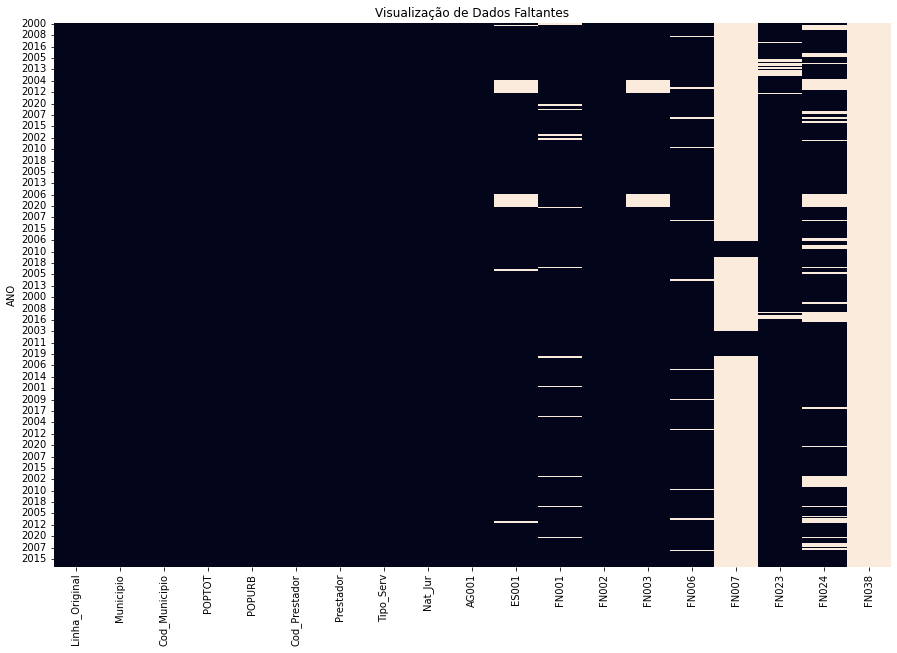

In [14]:
sns,set()
plt.figure(figsize = (15,10))
plt.title('Visualização de Dados Faltantes')
sns_plot = sns.heatmap(df_mais_de_cem.isnull(), cbar = False)
sns_plot.figure.savefig('Imagens/' + 'heatmap' +'.png')

In [15]:
municipios = df_mais_de_cem['Municipio'].unique()
print(municipios.shape)
print(df_mais_de_cem['Municipio'].value_counts())

(20,)
Uruguaiana           22
Alvorada             21
Pelotas              21
Sapucaia do Sul      21
Sao Leopoldo         21
Santa Maria          21
Santa Cruz do Sul    21
Rio Grande           21
Porto Alegre         21
Passo Fundo          21
Gravatai             21
Caxias do Sul        21
Canoas               21
Cachoeirinha         21
Viamao               21
Bage                 19
Novo Hamburgo        18
Bento Goncalves      17
Erechim               9
Guaiba                3
Name: Municipio, dtype: int64


In [16]:
df_mais_de_cem_agua_esgoto = df_mais_de_cem.loc[:,['Municipio', 'Cod_Prestador', 'Prestador', 'Tipo_Serv' , 'AG001', 'ES001']]
df_mais_de_cem_agua_esgoto

,Municipio,Cod_Prestador,Prestador,Tipo_Serv,AG001,ES001
ANO,,,,,,
2000,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,184666.0,33353.0
2001,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,191885.0,NaN
2002,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,194479.0,33820.0
2003,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,198705.0,35265.0
2004,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,201379.0,36195.0
...,...,...,...,...,...,...
2016,Viamao,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,224911.0,3709.0
2017,Viamao,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,226012.0,3935.0
2018,Viamao,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,227122.0,4064.0


In [17]:
# Proporção de missing
df_mais_de_cem_agua_esgoto.isnull().sum()

Municipio         0
Cod_Prestador     0
Prestador         0
Tipo_Serv         0
AG001             0
ES001            21
dtype: int64

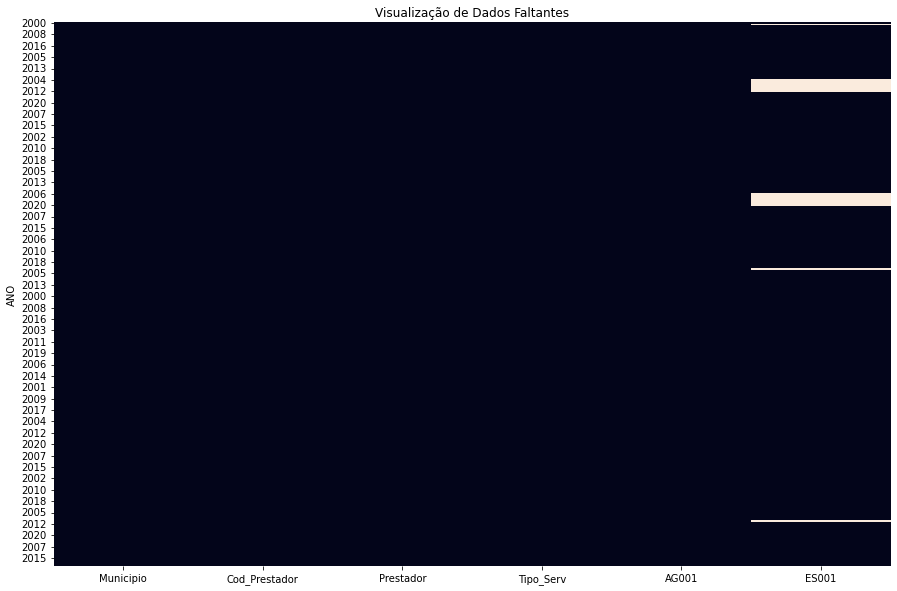

In [18]:
sns,set()
plt.figure(figsize = (15,10))
plt.title('Visualização de Dados Faltantes')
sns_plot = sns.heatmap(df_mais_de_cem_agua_esgoto.isnull(), cbar = False)

In [19]:
municipios = df_mais_de_cem_agua_esgoto['Municipio'].unique()
print(municipios.shape)

(20,)


In [20]:
print(df_mais_de_cem_agua_esgoto['Municipio'].value_counts())

Uruguaiana           22
Alvorada             21
Pelotas              21
Sapucaia do Sul      21
Sao Leopoldo         21
Santa Maria          21
Santa Cruz do Sul    21
Rio Grande           21
Porto Alegre         21
Passo Fundo          21
Gravatai             21
Caxias do Sul        21
Canoas               21
Cachoeirinha         21
Viamao               21
Bage                 19
Novo Hamburgo        18
Bento Goncalves      17
Erechim               9
Guaiba                3
Name: Municipio, dtype: int64


In [21]:
# drop Erechim e Guaíba (9 e 3 obs respectivamente)
df_mais_de_cem_agua_esgoto = df_mais_de_cem_agua_esgoto[df_mais_de_cem_agua_esgoto.Municipio != 'Erechim']
df_mais_de_cem_agua_esgoto = df_mais_de_cem_agua_esgoto[df_mais_de_cem_agua_esgoto.Municipio != 'Guaiba']

In [22]:
print(df_mais_de_cem_agua_esgoto['Municipio'].value_counts())

Uruguaiana           22
Alvorada             21
Porto Alegre         21
Sapucaia do Sul      21
Sao Leopoldo         21
Santa Maria          21
Santa Cruz do Sul    21
Rio Grande           21
Pelotas              21
Passo Fundo          21
Gravatai             21
Caxias do Sul        21
Canoas               21
Cachoeirinha         21
Viamao               21
Bage                 19
Novo Hamburgo        18
Bento Goncalves      17
Name: Municipio, dtype: int64


In [23]:
df_mais_de_cem_agua_esgoto.isnull().sum()

Municipio         0
Cod_Prestador     0
Prestador         0
Tipo_Serv         0
AG001             0
ES001            12
dtype: int64

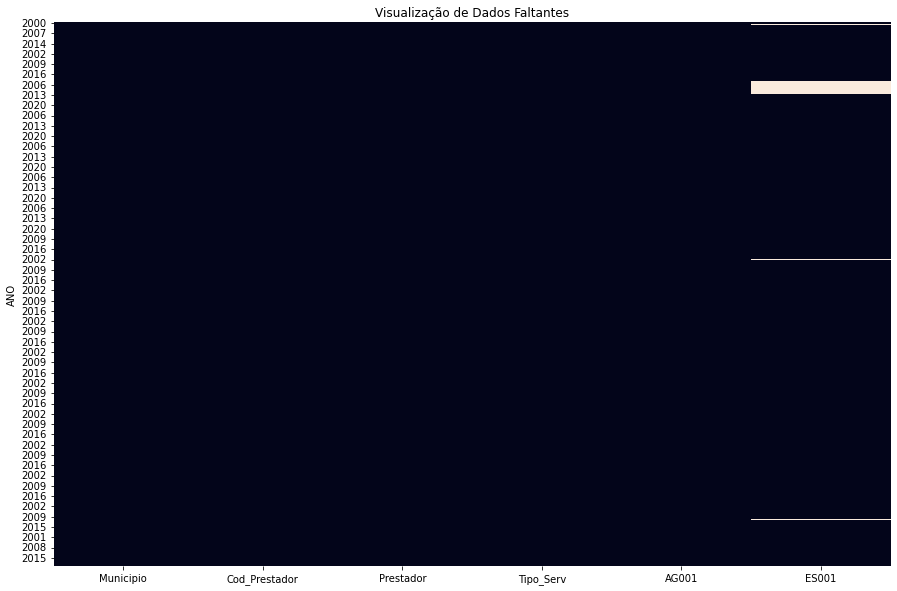

In [24]:
sns,set()
plt.figure(figsize = (15,10))
plt.title('Visualização de Dados Faltantes')
sns_plot = sns.heatmap(df_mais_de_cem_agua_esgoto.isnull(), cbar = False)
sns_plot.figure.savefig('Imagens/' + 'heatmap-reduzido' +'.png')

## Fase 1 - Fim

## Fase 2 - Início

1. Objetivo: Preparar os dados e gerar previsões das variáveis 'AG001' e 'ES001' para cada município.

- A. Descartar as observações (linhas) com dados duplicados;
- B. Descartar as observações (linhas) com dados faltantes;
- C. Verificar os dados faltantes entre 2000 e 2020. Selecionar o último período de observações sem dados faltantes, a fim de utilizar esse período para as previsões depois do ano de 2020.
- D. Gerar previsões para os cinco anos seguintes ao ano 2000 (último ano observado no banco de dados.);
- E. Salvar em arquivo csv os dados descartados e outro arquivo csv com as previsões de cobertura de água e esgoto dos anos 2021 até 2025 para cada município.

In [25]:
# Lista de municípios
lista_municipios = df_mais_de_cem_agua_esgoto['Municipio'].unique()
lista_municipios

array(['Alvorada', 'Bage', 'Bento Goncalves', 'Cachoeirinha', 'Canoas',
       'Caxias do Sul', 'Gravatai', 'Novo Hamburgo', 'Passo Fundo',
       'Pelotas', 'Porto Alegre', 'Rio Grande', 'Santa Cruz do Sul',
       'Santa Maria', 'Sao Leopoldo', 'Sapucaia do Sul', 'Uruguaiana',
       'Viamao'], dtype=object)

In [26]:
num_municipios = lista_municipios.shape[0]
num_municipios

18

In [27]:
###################################
# Seleciona o Município
# Seleção será feita de forma manual. Isto é, devemos selecionar cada município
# selecionando um valor entre 0 e 17.

municipio = lista_municipios[0]
municipio
###################################

'Alvorada'

In [28]:
df_mais_de_cem_agua_esgoto_municipio = df_mais_de_cem_agua_esgoto[df_mais_de_cem_agua_esgoto['Municipio'] == municipio]

In [29]:
df_mais_de_cem_agua_esgoto_municipio

,Municipio,Cod_Prestador,Prestador,Tipo_Serv,AG001,ES001
ANO,,,,,,
2000,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,184666.0,33353.0
2001,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,191885.0,NaN
2002,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,194479.0,33820.0
2003,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,198705.0,35265.0
2004,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,201379.0,36195.0
2005,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,203842.0,36330.0
2006,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,171302.0,31137.0
2007,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,173636.0,31760.0
2008,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,176258.0,32698.0


In [30]:
# Total de observações = 21?
df_mais_de_cem_agua_esgoto_municipio.shape[0] == 21

True

In [31]:
# Anos que não constam entre 2000 e 2020
anos_faltantes = [x for x in range(2000, 2021) if x not in df_mais_de_cem_agua_esgoto_municipio.index]
anos_faltantes

[]

In [32]:
# Linhas duplicadas
df_duplicadas = df_mais_de_cem_agua_esgoto_municipio[df_mais_de_cem_agua_esgoto_municipio.index.duplicated(keep = False)]
#df_duplicadas.to_latex()
print(df_duplicadas.shape)
print(df_duplicadas)

(0, 6)
Empty DataFrame
Columns: [Municipio, Cod_Prestador, Prestador, Tipo_Serv, AG001, ES001]
Index: []


In [33]:
# Existe linhas duplicadas?
print(df_duplicadas.shape[0] == 0)

True


In [34]:
# Quantidade de dados faltantes
df_mais_de_cem_agua_esgoto_municipio.isnull().sum()

Municipio        0
Cod_Prestador    0
Prestador        0
Tipo_Serv        0
AG001            0
ES001            1
dtype: int64

In [35]:
# Deleta linhas com dados faltantes
df_mais_de_cem_agua_esgoto_municipio.dropna(axis = 0, subset = ['ES001'], inplace = True)

In [36]:
df_mais_de_cem_agua_esgoto_municipio

,Municipio,Cod_Prestador,Prestador,Tipo_Serv,AG001,ES001
ANO,,,,,,
2000,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,184666.0,33353.0
2002,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,194479.0,33820.0
2003,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,198705.0,35265.0
2004,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,201379.0,36195.0
2005,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,203842.0,36330.0
2006,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,171302.0,31137.0
2007,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,173636.0,31760.0
2008,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,176258.0,32698.0
2009,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,177605.0,32792.0


In [37]:
################ Alterar aqui se for necessário ################
#Seleciona só o último período com dados completos. Isto é, sem dados anos faltantes
df_mais_de_cem_agua_esgoto_municipio_copia = df_mais_de_cem_agua_esgoto_municipio.iloc[1:,:].copy()
################ Alterar aqui se for necessário ################

In [38]:
df_mais_de_cem_agua_esgoto_municipio_copia

,Municipio,Cod_Prestador,Prestador,Tipo_Serv,AG001,ES001
ANO,,,,,,
2002,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,194479.0,33820.0
2003,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,198705.0,35265.0
2004,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,201379.0,36195.0
2005,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,203842.0,36330.0
2006,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,171302.0,31137.0
2007,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,173636.0,31760.0
2008,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,176258.0,32698.0
2009,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,177605.0,32792.0
2010,Alvorada,43149000,Companhia Rio-Grandense de Saneamento,Agua e Esgoto,179572.0,33456.0


In [39]:
col_drop = ['Municipio', 'Cod_Prestador', 'Prestador', 'Tipo_Serv']
df_mais_de_cem_agua_esgoto_municipio_copia.drop(col_drop, axis = 1, inplace = True)
df_mais_de_cem_agua_esgoto_municipio_copia.head()

,AG001,ES001
ANO,,
2002,194479.0,33820.0
2003,198705.0,35265.0
2004,201379.0,36195.0
2005,203842.0,36330.0
2006,171302.0,31137.0


## Aprendizado de Máquina

In [40]:
def series_para_supervisionado(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = concat(cols, axis = 1)
    if dropnan:
        agg.dropna(inplace = True)
    return agg.values

In [41]:
def treino_teste_divisao(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [42]:
def random_forest(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators = 1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [43]:
def validacao_walk_forward(data, n_test):
    predictions = list()
    train, test = treino_teste_divisao(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest(history, testX)     
        predictions.append(yhat)
        history.append(test[i])
    mae = mean_absolute_error(test[:, -1], predictions)
    mape = mean_absolute_percentage_error(test[:, -1], predictions)
    rmse = np.sqrt(mean_squared_error(test[:, -1], predictions))
    
    return mae, mape, rmse, test[:, -1], predictions

In [44]:
values_AG001 = df_mais_de_cem_agua_esgoto_municipio_copia['AG001'].values.tolist()
values_ES001 = df_mais_de_cem_agua_esgoto_municipio_copia['ES001'].values.tolist()

In [46]:
# Defina o número de observações de atraso como entrada
lag = 10 # atraso 10
testes = 5 # 5

data_AG001 = series_para_supervisionado(values_AG001, n_in = lag)

mae, mape, rmse, y, yhat = validacao_walk_forward(data_AG001, testes)

print('AG001')
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('RMSE: %.3f' % rmse)
print('===========')

data_ES001 = series_para_supervisionado(values_ES001, n_in = lag)
mae, mape, rmse, y, yhat = validacao_walk_forward(data_ES001, 2)

print('ES001')
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('RMSE: %.3f' % rmse)

AG001
MAE: 3745.086
MAPE: 0.018
RMSE: 4107.060
ES001
MAE: 12520.007
MAPE: 0.193
RMSE: 14170.976


# Modelo Final
### Previsão para 5 anos

In [47]:
def previsao(val, lag):
    ano = 2021
    forecast = []
    years_forward = 5
    for i in range(years_forward):
        train = series_para_supervisionado(val, n_in = lag)
        trainX, trainy = train[:, :-1], train[:, -1]
        model = RandomForestRegressor(n_estimators = 1000)
        model.fit(trainX, trainy)
        row = val[-lag:]
        yhat = model.predict(asarray([row]))
        forecast.append(yhat[0])
        print(str(ano) + ': %.0f' % yhat[0]) 
        val.append(yhat[0])
        lag += 1
        ano += 1
        
    return val, forecast

In [48]:
print('Previsão Água')
todos_valores_AG001, previsoes_AG001 = previsao(values_AG001, lag)
print('Previsão Esgoto')
todos_valores_ES001, previsoes_ES001 = previsao(values_ES001, lag)

Previsão Água
2021: 209642
2022: 209526
2023: 209670
2024: 209702
2025: 209633
Previsão Esgoto
2021: 62009
2022: 61649
2023: 61091
2024: 60027
2025: 58704


In [49]:
titulo = municipio

In [50]:
ano_ini = df_mais_de_cem_agua_esgoto_municipio_copia.index[0]
anos = list(range(ano_ini, ano_ini + len(values_AG001)))

In [51]:
total_anos_obs = df_mais_de_cem_agua_esgoto_municipio_copia.index.shape[0]

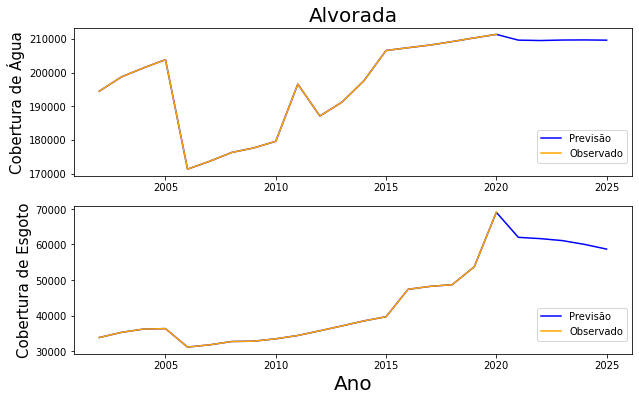

In [53]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
######## Verificar a acentuação do título ###

#plt.title('NOME DO MUNICÍPIO COM ACENTUAÇÃO', size = 20)
plt.title(titulo, size = 20)

#############################################
plt.plot(anos, todos_valores_AG001, label = 'Previsão', color = 'blue')
x_lim_obs = np.arange(ano_ini, ano_ini + total_anos_obs)
plt.plot(x_lim_obs, df_mais_de_cem_agua_esgoto_municipio_copia['AG001'], label = 'Observado', color = 'orange');
plt.ylabel('Cobertura de Água', size = 15)
plt.legend(bbox_to_anchor = (1.0,0.2),loc = 'right')

plt.subplot(2, 1, 2)
plt.plot(anos, todos_valores_ES001, label = 'Previsão', color = 'blue')
plt.plot(x_lim_obs, df_mais_de_cem_agua_esgoto_municipio_copia['ES001'], label = 'Observado', color = 'orange');
plt.xlabel('Ano', size = 20)
plt.ylabel('Cobertura de Esgoto', size = 15)
plt.legend(bbox_to_anchor = (1.0,0.2),loc = 'right')

plt.savefig('Imagens/' + municipio +'.png')
plt.show()